In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ks_data=pd.read_csv("dataset/ks-projects-201801.csv")
np.random.seed(0)
ks_data.sample(5)

ID                                               name  \
338862   796196901                                 10G Christmas Tree   
277871   483825010                                              Gliff   
47000    123916947                                 STUFFED Food Truck   
111338  1565733636  NeoExodus Adventure: Origin of Man for Pathfin...   
53743   1273544891        NAPOLEON IN NEW YORK! an original TV Series   

               category main_category currency    deadline     goal  \
338862              Art           Art      USD  2010-12-26  10526.0   
277871  Gaming Hardware         Games      USD  2016-03-28  10000.0   
47000       Food Trucks          Food      USD  2015-01-06  60000.0   
111338   Tabletop Games         Games      USD  2012-05-01    500.0   
53743            Comedy  Film & Video      USD  2016-07-26  25000.0   

                   launched  pledged       state  backers country  \
338862  2010-12-08 08:44:04      0.0      failed        0      US   
277871  2016-01-28 04:56:18     51.0      failed        5      US   
47000   2014-11-07 02:24:36     25.0      failed        1      US   
111338  2012-03-15 01:16:10    585.0  successful       17      US   
53743   2016-05-27 00:07:25     25.0      failed        1      US   

        usd pledged  usd_pledged_real  usd_goal_real  
338862          0.0               0.0        10526.0  
277871         51.0              51.0        10000.0  
47000          25.0              25.0        60000.0  
111338        585.0             585.0          500.0  
53743          25.0              25.0        25000.0

In [3]:
missing_values_count=ks_data.isnull().sum()
print(missing_values_count)
print(ks_data.dtypes)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


In [4]:
total_cells=np.product(ks_data.shape)
total_missing=missing_values_count.sum()
(total_missing/total_cells)*100

0.06692001552840139

In [5]:
ks_data[ks_data.isnull().values==True].head()

ID                                       name      category  \
169  1000694855              STREETFIGHTERZ WHEELIE MURICA  Film & Video   
328   100149523                Duncan Woods - Chameleon EP         Music   
632  1003023003  The Making of Ashley Kelley's Debut Album         Music   
647  1003130892               Butter Side Down Debut Album         Music   
749  1003629045                    Chase Goehring debut EP         Music   

    main_category currency    deadline    goal             launched  pledged  \
169  Film & Video      USD  2014-09-20  6500.0  2014-08-06 21:28:36   555.00   
328         Music      AUD  2015-08-25  4500.0  2015-08-04 12:05:17  4767.00   
632         Music      USD  2015-04-09  3500.0  2015-03-10 20:06:13  3576.00   
647         Music      USD  2015-11-26  6000.0  2015-11-02 22:09:19  7007.80   
749         Music      USD  2016-03-21  3000.0  2016-02-23 03:09:49  3660.38   

         state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
169  undefined        0    N,0"          NaN            555.00        6500.00  
328  undefined        0    N,0"          NaN           3402.08        3211.53  
632  undefined        0    N,0"          NaN           3576.00        3500.00  
647  undefined        0    N,0"          NaN           7007.80        6000.00  
749  undefined        0    N,0"          NaN           3660.38        3000.00

In [6]:
ks_data[ks_data['name'].isnull().values==True]

ID name        category main_category currency    deadline  \
166851  1848699072  NaN  Narrative Film  Film & Video      USD  2012-02-29   
307234   634871725  NaN     Video Games         Games      GBP  2013-01-06   
309991   648853978  NaN  Product Design        Design      USD  2016-07-18   
338931   796533179  NaN        Painting           Art      USD  2011-12-05   

            goal             launched  pledged      state  backers country  \
166851  200000.0  2012-01-01 12:35:31    100.0     failed        1      US   
307234    2000.0  2012-12-19 23:57:48    196.0     failed       12      GB   
309991    2500.0  2016-06-18 05:01:47      0.0  suspended        0      US   
338931   35000.0  2011-11-06 23:55:55    220.0     failed        5      US   

        usd pledged  usd_pledged_real  usd_goal_real  
166851       100.00            100.00      200000.00  
307234       317.73            316.05        3224.97  
309991         0.00              0.00        2500.00  
338931       220.00            220.00       35000.00

In [7]:
ks18=pd.read_csv("dataset/ks-projects-201801-Cleaning.csv")

In [8]:
ks18.head()

ID        category main_category country    launched    deadline  \
0  1000002330          Poetry    Publishing      GB  2015-08-11  2015-10-09   
1  1000003930  Narrative Film  Film & Video      US  2017-09-02  2017-11-01   
2  1000004038  Narrative Film  Film & Video      US  2013-01-12  2013-02-26   
3  1000007540           Music         Music      US  2012-03-17  2012-04-16   
4  1000011046    Film & Video  Film & Video      US  2015-07-04  2015-08-29   

                     duration  usd_pledged_real  usd_goal_real  backers  \
0  59 days 00:00:00.000000000               0.0        1533.95        0   
1  60 days 00:00:00.000000000            2421.0       30000.00       15   
2  45 days 00:00:00.000000000             220.0       45000.00        3   
3  30 days 00:00:00.000000000               1.0        5000.00        1   
4  56 days 00:00:00.000000000            1283.0       19500.00       14   

      state  launched year  
0    failed           2015  
1    failed           2017  
2    failed           2013  
3    failed           2012  
4  canceled           2015

In [9]:
# Main Category
# Pledged amount across categories
pledged_sum_cate={}
for category in list(set(ks18['main_category'])):
    pledged_sum_cate[category]=ks18[ks18['main_category']==category]['usd_pledged_real'].sum()
# create dataframe   
categ=pd.Series(pledged_sum_cate)
categ=pd.DataFrame(categ)
categ=categ.rename(columns={0:"pledged_sum"})

categ.head()

pledged_sum
Design      7.342202e+08
Art         9.068045e+07
Fashion     1.303353e+08
Publishing  1.335760e+08
Crafts      1.438428e+07

In [10]:
# Number of projects across categories
cate_count={}
for category in list(set(ks18['main_category'])):
    cate_count[category]=ks18[ks18['main_category']==category]['main_category'].count()

categ['count']=pd.Series(cate_count)

categ.head()

pledged_sum  count
Design      7.342202e+08  30069
Art         9.068045e+07  28152
Fashion     1.303353e+08  22816
Publishing  1.335760e+08  39873
Crafts      1.438428e+07   8809

In [11]:
# Average pledged amount
categ['average_amount']=categ['pledged_sum']/categ['count']
categ.head()

pledged_sum  count  average_amount
Design      7.342202e+08  30069    24417.846732
Art         9.068045e+07  28152     3221.101382
Fashion     1.303353e+08  22816     5712.450839
Publishing  1.335760e+08  39873     3350.035946
Crafts      1.438428e+07   8809     1632.907282

In [12]:
# Success rate across categories
success={}
for category in list(set(ks18['main_category'])):
    success[category]=len(ks18[(ks18['main_category']==category) & (ks18['state']=="successful")])
    
categ['success_count']=pd.Series(success)
categ.head()

pledged_sum  count  average_amount  success_count
Design      7.342202e+08  30069    24417.846732          10550
Art         9.068045e+07  28152     3221.101382          11510
Fashion     1.303353e+08  22816     5712.450839           5593
Publishing  1.335760e+08  39873     3350.035946          12300
Crafts      1.438428e+07   8809     1632.907282           2115

In [13]:
categ['Success']=categ['success_count']/categ['count']
categ.head()

pledged_sum  count  average_amount  success_count   Success
Design      7.342202e+08  30069    24417.846732          10550  0.350860
Art         9.068045e+07  28152     3221.101382          11510  0.408852
Fashion     1.303353e+08  22816     5712.450839           5593  0.245135
Publishing  1.335760e+08  39873     3350.035946          12300  0.308479
Crafts      1.438428e+07   8809     1632.907282           2115  0.240095

In [14]:
# Backers across categories
backers={}
for category in list(set(ks18['main_category'])):
    backers[category]=ks18[ks18['main_category']==category]['backers'].sum()
    
categ['backers']=pd.Series(backers)
categ.head()

pledged_sum  count  average_amount  success_count   Success  \
Design      7.342202e+08  30069    24417.846732          10550  0.350860   
Art         9.068045e+07  28152     3221.101382          11510  0.408852   
Fashion     1.303353e+08  22816     5712.450839           5593  0.245135   
Publishing  1.335760e+08  39873     3350.035946          12300  0.308479   
Crafts      1.438428e+07   8809     1632.907282           2115  0.240095   

            backers  
Design      7255880  
Art         1188200  
Fashion     1401993  
Publishing  2231589  
Crafts       240342

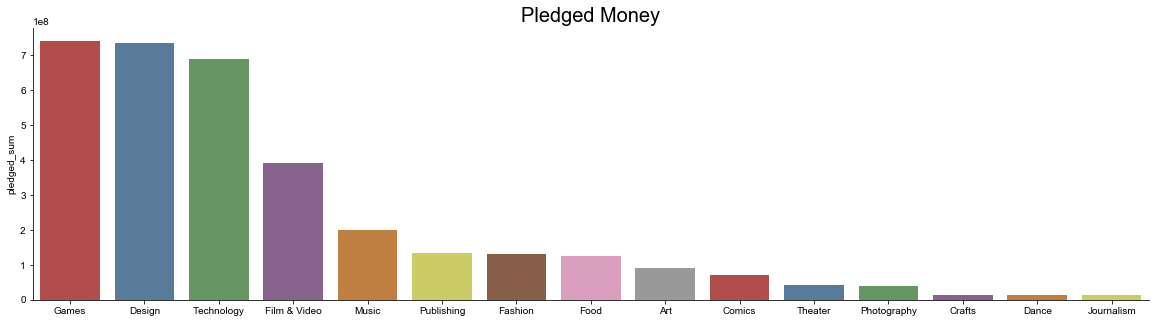

In [15]:
# pledged_sum plot
categ=categ.sort_values('pledged_sum', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['pledged_sum'].index, y=categ['pledged_sum'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.title('Pledged Money',fontsize=20)
plt.show()

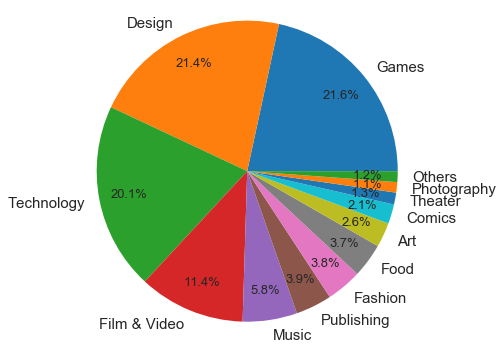

In [16]:
plt.figure(figsize=(6,6))
pledg=categ['pledged_sum'][0:-3]
add={}
add['Others']=categ['pledged_sum'][-3:].sum()
pledg=pledg.append(pd.Series(add))
patches,l_text,p_text=plt.pie(pledg,labels=pledg.index,autopct='%3.1f%%',startangle=0,pctdistance=0.8)
for t in l_text:
    t.set_fontsize(15)
for t in p_text:
    t.set_fontsize(13)
plt.axis('equal')
#plt.title('Pledged Money',fontsize=17)
plt.show()

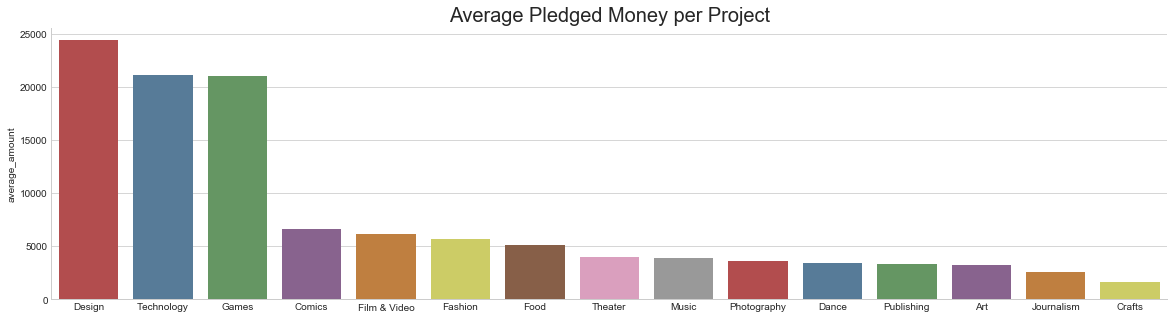

In [17]:
# average_amount plot
categ=categ.sort_values('average_amount', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['average_amount'].index, y=categ['average_amount'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.title('Average Pledged Money per Project',fontsize=20)
plt.show()

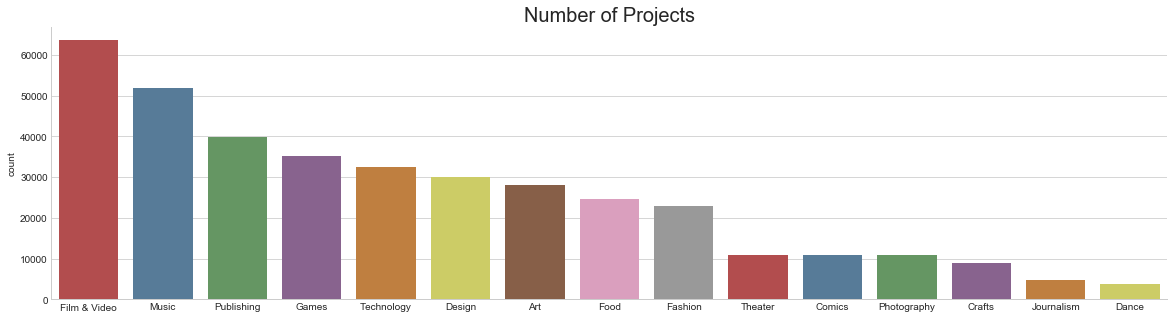

In [18]:
# count plot
categ=categ.sort_values('count', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['count'].index, y=categ['count'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.title('Number of Projects',fontsize=20)
plt.show()

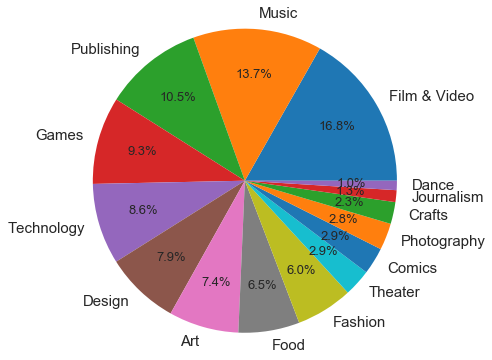

In [19]:
plt.figure(figsize=(6,6))
count=categ['count']#[1:-3]
#add={}
#add['Others']=categ['pledged_sum'][-3:].sum()
#pledg=pledg.append(pd.Series(add))
patches,l_text,p_text=plt.pie(count,labels=count.index,autopct='%3.1f%%',startangle=0,pctdistance=0.7)
for t in l_text:
    t.set_fontsize(15)
for t in p_text:
    t.set_fontsize(13)
plt.axis('equal')
#plt.title('Number of Projects',fontsize=17)
plt.show()

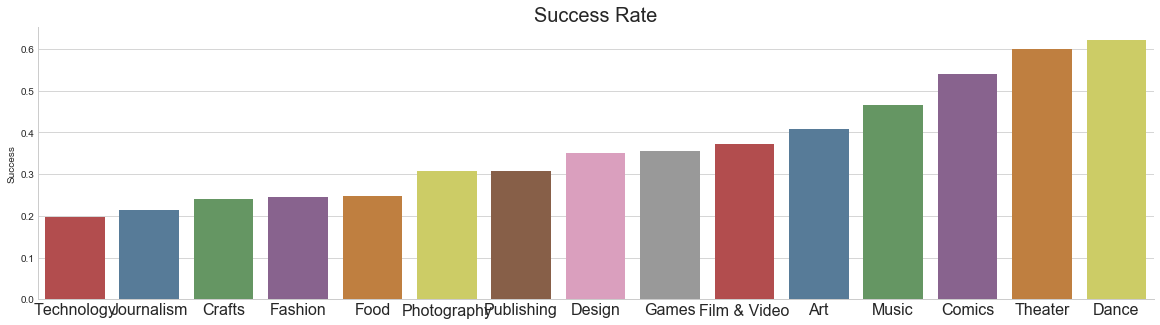

In [20]:
# success_rate plot
import matplotlib.ticker as mtick
categ=categ.sort_values('Success', ascending=True)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['Success'].index, y=categ['Success'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.xticks(fontsize=16)
plt.title('Success Rate',fontsize=20)
plt.show()


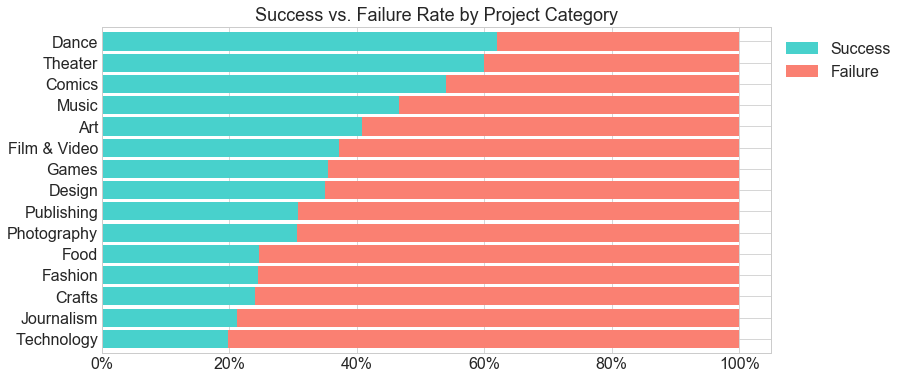

In [21]:
suc=categ['Success']
suc=pd.DataFrame(suc)
suc=suc.rename(columns={0:"Success"})
suc['Failure']=1-suc['Success']
suc.plot.barh(stacked=True,width = 0.85,figsize=(12,6),color=['mediumturquoise','salmon'])
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
#plt.grid(c='white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1,1),loc='best',fontsize=16)
plt.title('Success vs. Failure Rate by Project Category',fontsize=18)
plt.show()

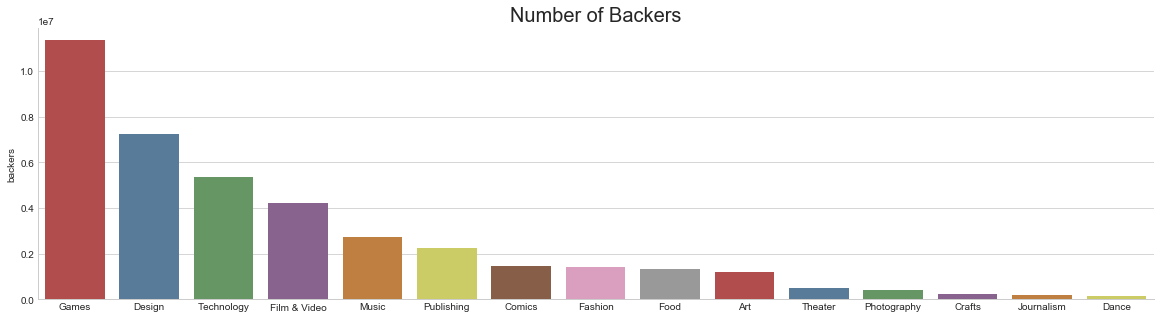

In [22]:
# backers plot
categ=categ.sort_values('backers', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['backers'].index, y=categ['backers'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.title('Number of Backers',fontsize=20)
plt.show()


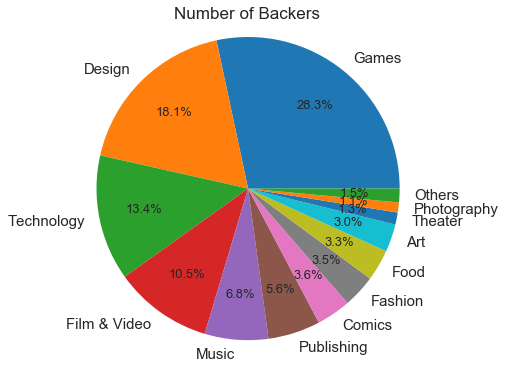

In [23]:
plt.figure(figsize=(6,6))
backers=categ['backers'][0:-3]
add={}
add['Others']=categ['backers'][-3:].sum()
backers=backers.append(pd.Series(add))
patches,l_text,p_text=plt.pie(backers,labels=backers.index,autopct='%3.1f%%',startangle=0,pctdistance=0.7)
for t in l_text:
    t.set_fontsize(15)
for t in p_text:
    t.set_fontsize(13)
plt.axis('equal')
plt.title('Number of Backers',fontsize=17)
plt.show()

In [24]:
# usd_goal_real
goal_sum={}
for category in list(set(ks18['main_category'])):
    goal_sum[category]=ks18[ks18['main_category']==category]['usd_goal_real'].sum()


categ['goal_sum']=pd.Series(goal_sum)
categ['goal_average']=categ['goal_sum']/categ['count']

categ.head()

pledged_sum  count  average_amount  success_count   Success  \
Games         7.413273e+08  35231    21041.903140          12518  0.355312   
Design        7.342202e+08  30069    24417.846732          10550  0.350860   
Technology    6.888725e+08  32569    21151.171165           6434  0.197550   
Film & Video  3.915551e+08  63583     6158.172126          23623  0.371530   
Music         2.003187e+08  51917     3858.441926          24197  0.466071   

               backers      goal_sum   goal_average  
Games         11336829  1.582708e+09   44923.741408  
Design         7255880  1.259072e+09   41872.764473  
Technology     5356513  3.331436e+09  102288.542839  
Film & Video   4197577  5.253724e+09   82627.801581  
Music          2708475  7.980819e+08   15372.265320

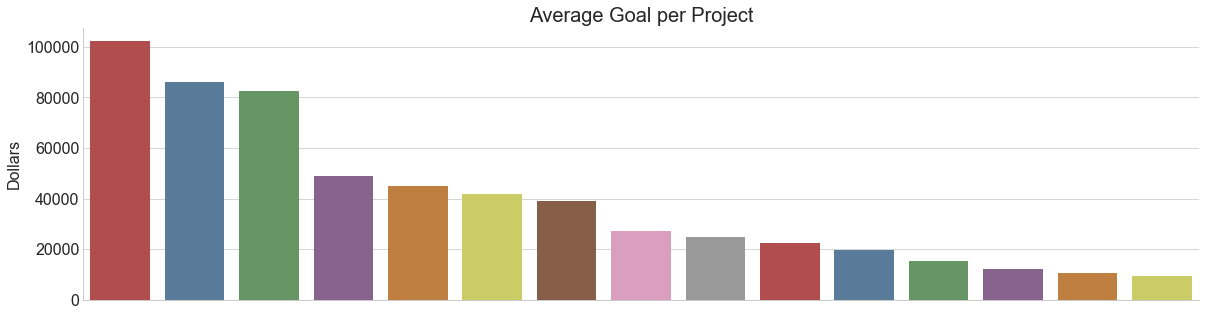

In [25]:
categ=categ.sort_values('goal_average', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['goal_average'].index, y=categ['goal_average'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.title('Average Goal per Project',fontsize=20)
plt.xticks([])
#plt.xticks(rotation=25)
plt.yticks(fontsize=16)
plt.ylabel('Dollars',fontsize=16)
plt.show()
#plt.bosplot(categ['goal_sum'])

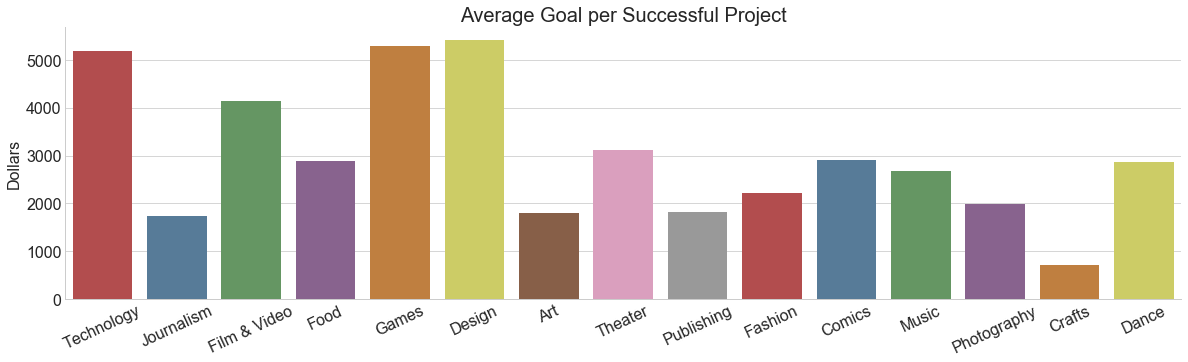

In [26]:
goal_success={}
for category in list(set(ks18['main_category'])):
    goal_success[category]=ks18[(ks18['main_category']==category) & (ks18['state']=="successful")]['usd_goal_real'].sum()
categ['goal_average_success']=pd.Series(goal_success)/categ['count']

#categ=categ.sort_values('goal_average_success', ascending=False)
plt.subplots(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(categ['goal_average_success'].index, y=categ['goal_average_success'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.xticks(fontsize=16)
plt.xticks(rotation=25)
plt.yticks(fontsize=16)
plt.ylabel('Dollars',fontsize=16)
plt.title('Average Goal per Successful Project',fontsize=20)
plt.show()

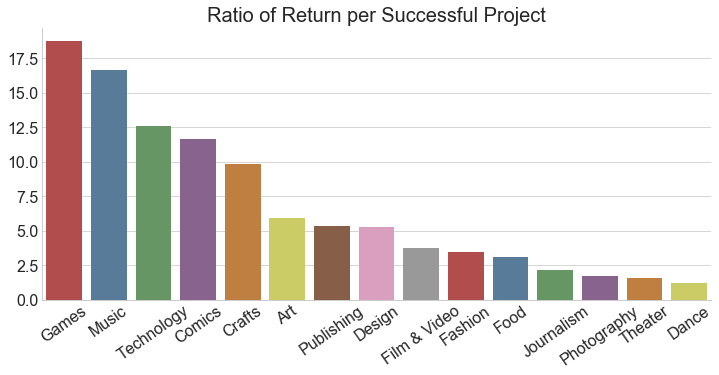

In [27]:
Rate_of_return={}
for category in list(set(ks18['main_category'])):
    index=(ks18['main_category']==category) & (ks18['state']=="successful")
    Rate_of_return[category]=np.mean(ks18[index]['usd_pledged_real']/ks18[index]['usd_goal_real'])
categ['Rate_of_return']=pd.Series(Rate_of_return)

categ=categ.sort_values('Rate_of_return', ascending=False)
plt.subplots(figsize=(12,5))
sns.set_style("whitegrid")
sns.barplot(categ['Rate_of_return'].index, y=categ['Rate_of_return'], palette="Set1", saturation=0.5)
sns.despine(right=True, top=True)
plt.xticks(fontsize=16)
plt.xticks(rotation=35)
plt.yticks(fontsize=16)
plt.ylabel('')
plt.title('Ratio of Return per Successful Project',fontsize=20)
plt.show()

In [28]:
print(list(set(ks18[ks18['main_category']=='Games']['category'])))
print(list(set(ks18[ks18['main_category']=='Design']['category'])))
print(list(set(ks18[ks18['main_category']=='Technology']['category'])))

['Video Games', 'Live Games', 'Tabletop Games', 'Mobile Games', 'Playing Cards', 'Gaming Hardware', 'Games', 'Puzzles']
['Graphic Design', 'Design', 'Civic Design', 'Typography', 'Product Design', 'Architecture', 'Interactive Design']
['Robots', 'Hardware', 'Gadgets', 'Sound', 'Web', 'DIY Electronics', 'Camera Equipment', 'Flight', '3D Printing', 'Software', 'Apps', 'Fabrication Tools', 'Makerspaces', 'Wearables', 'Technology', 'Space Exploration']


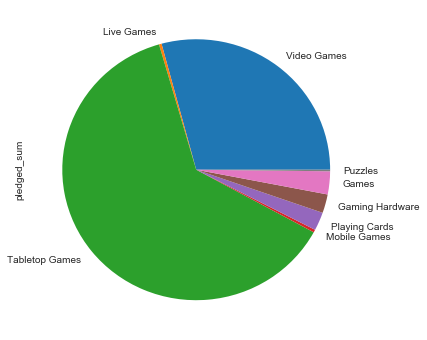

In [29]:
pledged_sum={}
for category in list(set(ks18[ks18['main_category']=='Games']['category'])):
    pledged_sum[category]=ks18[ks18['category']==category]['usd_pledged_real'].sum()
# create dataframe   
games=pd.Series(pledged_sum)
games=pd.DataFrame(games)
games=games.rename(columns={0:"pledged_sum"})

games['pledged_sum'].plot.pie(figsize=(6,6))